#Project Module 8: ODE

---


#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

#Euler's Method

In our project we are using two methods to try and estimate functions. In this Euler's section, we have two examples. The first example is testing the euler's function on the function:

In our first code block we are going to use the function below as our tester to see how well the Euler function works. We will use the equation below as our benchmark and then use the Euler function to see on the graph where the estimation stands relative to the benchmark

$
(x - 1.5)^3 - (2x - 1.5) + 4
$

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tabulate import tabulate

In [77]:
def f(x, y):
    return 3 * (x - 1.5)**2 - 2 # placeholder for testing

def origionalFunctionFun(x): 
    return (x - 1.5)**3 - (2 * x - 1.5) + 4 # curve from past projects

def eulerMethod(y, xStart, xLast, stepSize):
    if xStart >= xLast: # when to stop detection
        return [(xStart, y)]
    yTemp = y + stepSize * f(xStart, y) # Euler's method
    xTemp = xStart + stepSize # increase step size
    return [(xStart, y)] + eulerMethod(yTemp, xTemp, xLast, stepSize) # recursive point

def euler_method_recursive(y, x, x_end, step_size):
    if x >= x_end:
        return [(x, y)]
    y_next = y + step_size * fPrimeX(x, y)
    x_next = x + step_size
    return [(x, y)] + euler_method_recursive(y_next, x_next, x_end, step_size)

In [78]:
y0 = 2.125
min_x = 0
max_x = 3
step_size = 0.1

x_values, y_values = zip(*eulerMethod(y0, min_x, max_x, step_size)) # Separates x and y values returned

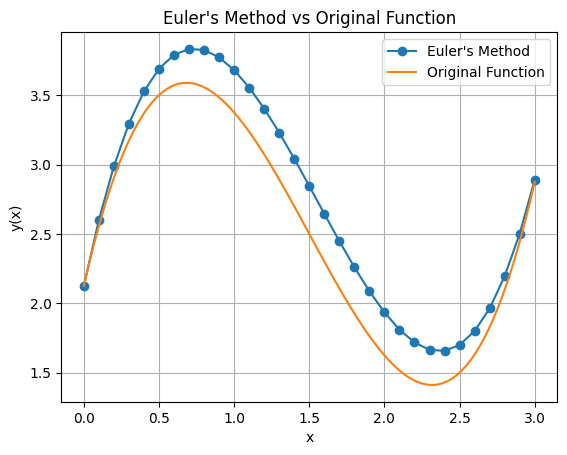

In [79]:
x_original = np.linspace(min_x, max_x, 100) # Generate x values for the original function
y_original = [origionalFunctionFun(x) for x in x_original] # Compute y values for the original function

# Plot the graph
plt.plot(x_values, y_values, marker='o', linestyle='-', label="Euler's Method")
plt.plot(x_original, y_original, label='Original Function')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Euler\'s Method vs Original Function')
plt.legend()
plt.grid(True)
plt.show()

Below is our Euler's method function used to estimate functions with given differential equation initial values, which are below. We are then able to compare on a graph the difference betweent Euler's method and the actual answer

$
\frac{dy}{dx} = f(x)(1-y), \quad y(0)=2 \qquad  
$

$
y(x) = 1 + ce^{-\int f(x)dx}
$

In [80]:
def f(x):
    return (x - 1.5)**3 - (2 * x - 1.5) + 4 # equation above

def fPrimeX(x, y):
    return f(x) * (1 - y) # Given differential equation initial value

def integralFun(x):
    result, _ = quad(f, 0, x) # scipy function that gives us the exact answer for us to compare to
    return result

def y(x):
  c = 2 # y(0) = 2
  return 1 + (c*2.71828) **(-integralFun(x)) #2.71828 is Euler's Constant (e)

def eulerMethod(y, xStart, xLast, stepSize):
  if xStart >= xLast: # when to stop detection
      return [(xStart, y)]
  yTemp = y + stepSize * fPrimeX(xStart, y) # Euler's method
  xTemp = xStart + stepSize # increase step size
  return [(xStart, y)] + eulerMethod(yTemp, xTemp, xLast, stepSize) # recursive point

In [81]:
y0 = 2
min_x = 0
max_x = 5
step_size = 0.25

# Separate x and y values from the result
x_values, y_values = zip(*eulerMethod(y0, min_x, max_x, step_size)) # Separates x and y values returned

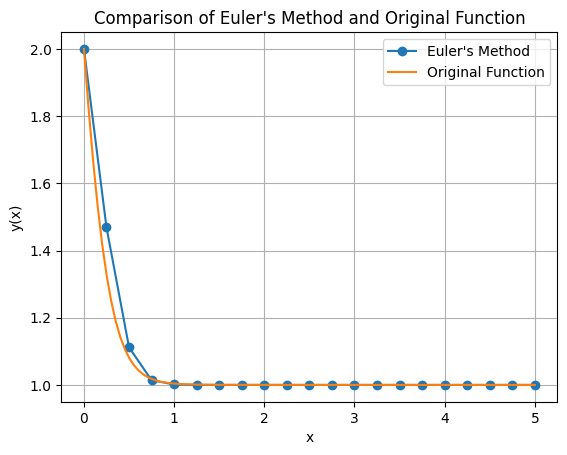

In [82]:

# Generate x values for the original function
x_original = np.linspace(min_x, max_x, 100)

# Compute y values for the original function
y_original = [y(x) for x in x_original]

# Plot the graph
plt.plot(x_values, y_values, marker='o', linestyle='-', label="Euler's Method")
plt.plot(x_original, y_original, label='Original Function')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of Euler\'s Method and Original Function')
plt.legend()
plt.grid(True)
plt.show()

(c) Graph the analytic solution and your numerical solution on this interval.

#Other Numerical Integration

Below is our Runge-Kutta 4th order method functions.

In [83]:
# Define the function f(x, y)
def fp(x, y):
  return 3 * (x - 1.5)**2 - 2

# Define the RK4 method
def rk4_method(y, x, xLast, stepSize):
  result = [(x, y)]
  while x < xLast:
      k1 = step_size * fp(x, y)
      k2 = step_size * fp(x + step_size / 2, y + k1 / 2)
      k3 = step_size * fp(x + step_size / 2, y + k2 / 2)
      k4 = step_size * fp(x + step_size, y + k3)
      y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
      x += step_size
      result.append((x, y))
  return result

def f(x):
  return (x - 1.5)**3 - (2 * x - 1.5) + 4

In [ ]:
# Set initial values and step size
y0 = 2.125
min_x = 0
max_x = 3
step_size = 0.2

# Extract x and y values from the result
xRK, yRK = zip(*rk4_method(y0, min_x, max_x, step_size))

# Compute errors
errors = []
for i in range(len(xRK)):
    x_val = xRK[i]
    y_val = yRK[i]
    errors.append([i, x_val, y_val, f(x_val), y_val - f(x_val)])

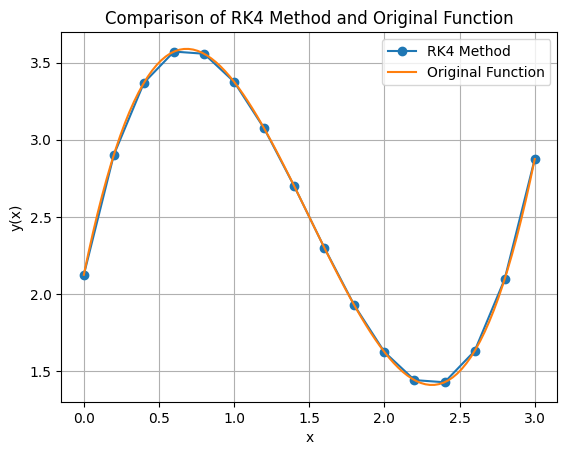

Error Table
+--------+-----+---------+-------------+--------------+
|   step |   x |   y_cur |   originalY |   error_next |
+========+=====+=========+=============+==============+
|      0 | 0   |   2.125 |       2.125 |  0           |
+--------+-----+---------+-------------+--------------+
|      1 | 0.2 |   2.903 |       2.903 |  0           |
+--------+-----+---------+-------------+--------------+
|      2 | 0.4 |   3.369 |       3.369 |  4.44089e-16 |
+--------+-----+---------+-------------+--------------+
|      3 | 0.6 |   3.571 |       3.571 |  0           |
+--------+-----+---------+-------------+--------------+
|      4 | 0.8 |   3.557 |       3.557 |  0           |
+--------+-----+---------+-------------+--------------+
|      5 | 1   |   3.375 |       3.375 |  0           |
+--------+-----+---------+-------------+--------------+
|      6 | 1.2 |   3.073 |       3.073 |  0           |
+--------+-----+---------+-------------+--------------+
|      7 | 1.4 |   2.699 |       2.6

In [86]:
# Generate x values for the original function
x_original = np.linspace(min_x, max_x, 100)

# Compute y values for the original function
y_original = [(x - 1.5)**3 - (2 * x - 1.5) + 4 for x in x_original]

# Plot the graph
plt.plot(xRK, yRK, label="RK4 Method", marker='o', linestyle='-')
plt.plot(x_original, y_original, label='Original Function')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of RK4 Method and Original Function')
plt.legend()
plt.grid(True)
plt.show()

print("Error Table")
print(tabulate(errors, headers=["step", "x", "y_cur", "originalY", "error_next"], tablefmt="grid"))

#Conclusion


We found that while the Runge-Kutta 4th order method and Euler's are both practical techniques for estimating solutions to ordinary differential equations, the Runge-Kutta 4th order method is more accurate than the Euler's method becuase there are more esimations in the calculation compared to a tangent line at the beginning like Euler's does. There is a tradeoff, however. Euler's method is less compuationally taxing for a low estimation, while the Runge-Kutta 4th order method is comparitively high for a high estimation.